  Country (region)  Ladder  ...  Log of GDP\nper capita  Healthy life\nexpectancy
0          Finland       1  ...                    22.0                      27.0
1          Denmark       2  ...                    14.0                      23.0
2           Norway       3  ...                     7.0                      12.0
3          Iceland       4  ...                    15.0                      13.0
4      Netherlands       5  ...                    12.0                      18.0

[5 rows x 11 columns]
Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64
Ladder                      0
SD of Ladder                0
Positive affect             0
Negative affect             0
Social support        

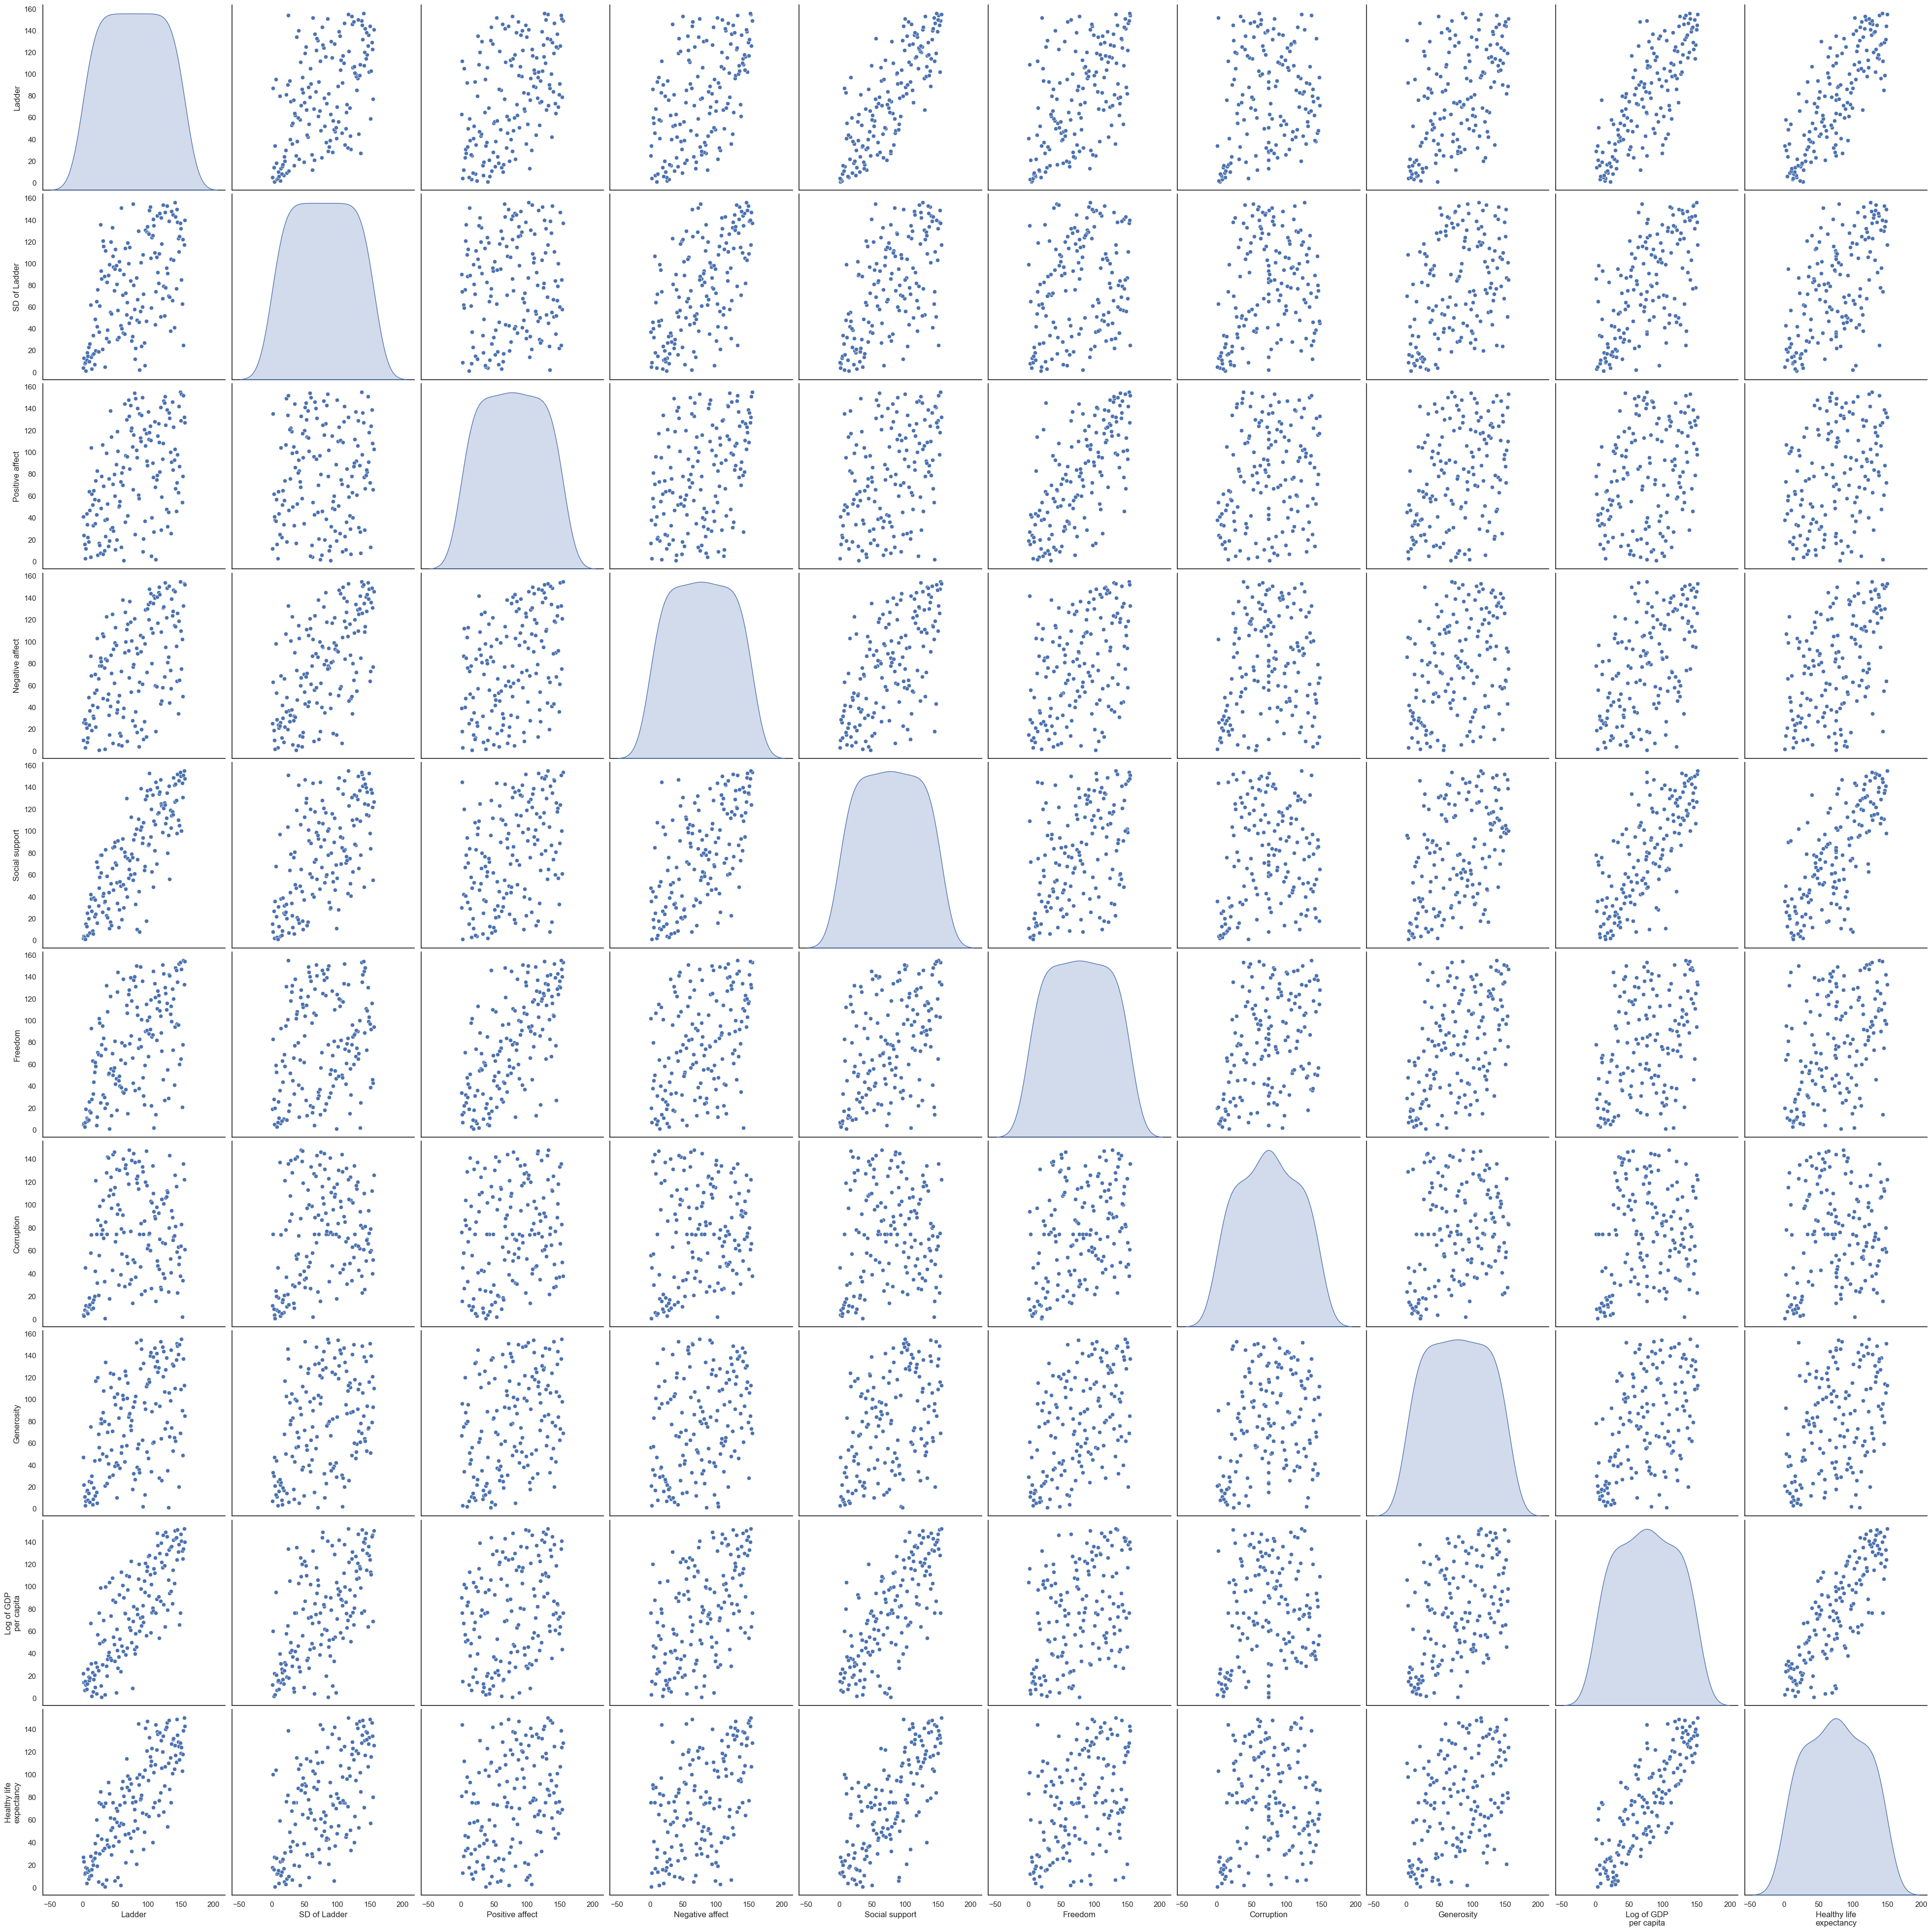

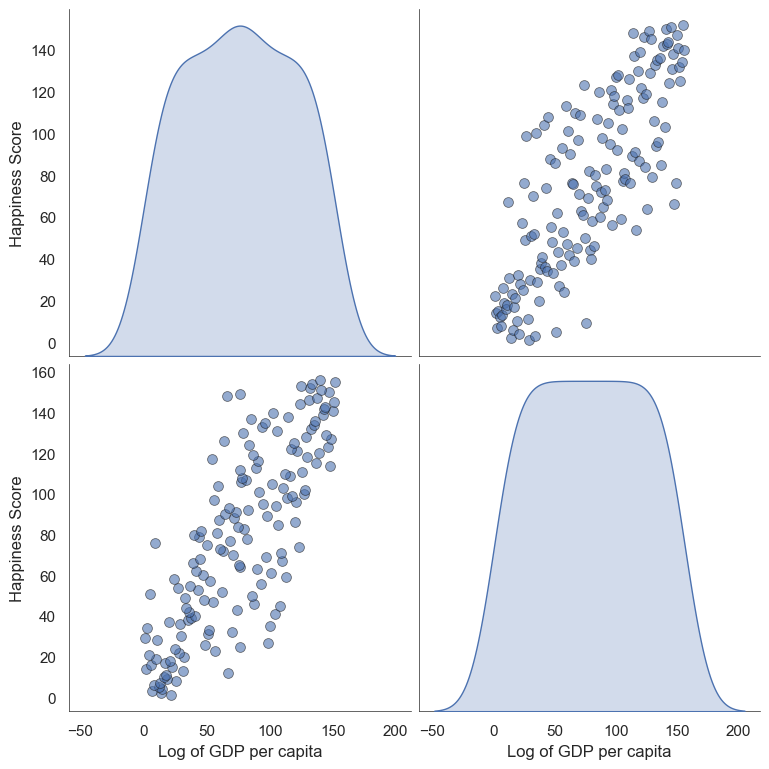

  Country (region)  Ladder  ...  Log of GDP\nper capita  Healthy life\nexpectancy
0          Finland       1  ...                    22.0                      27.0
1          Denmark       2  ...                    14.0                      23.0
2           Norway       3  ...                     7.0                      12.0
3          Iceland       4  ...                    15.0                      13.0
4      Netherlands       5  ...                    12.0                      18.0

[5 rows x 11 columns]


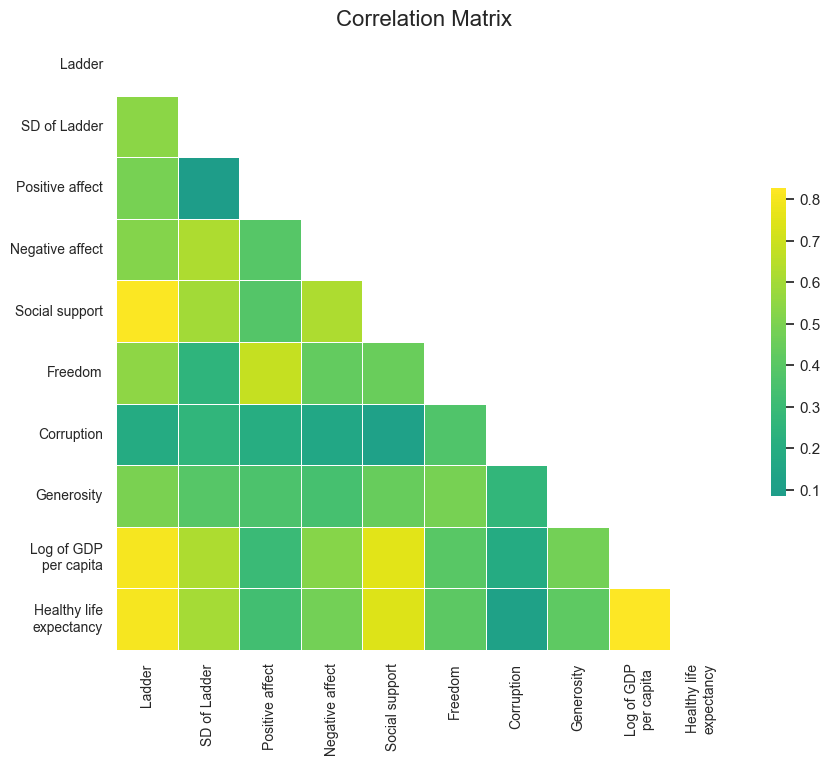

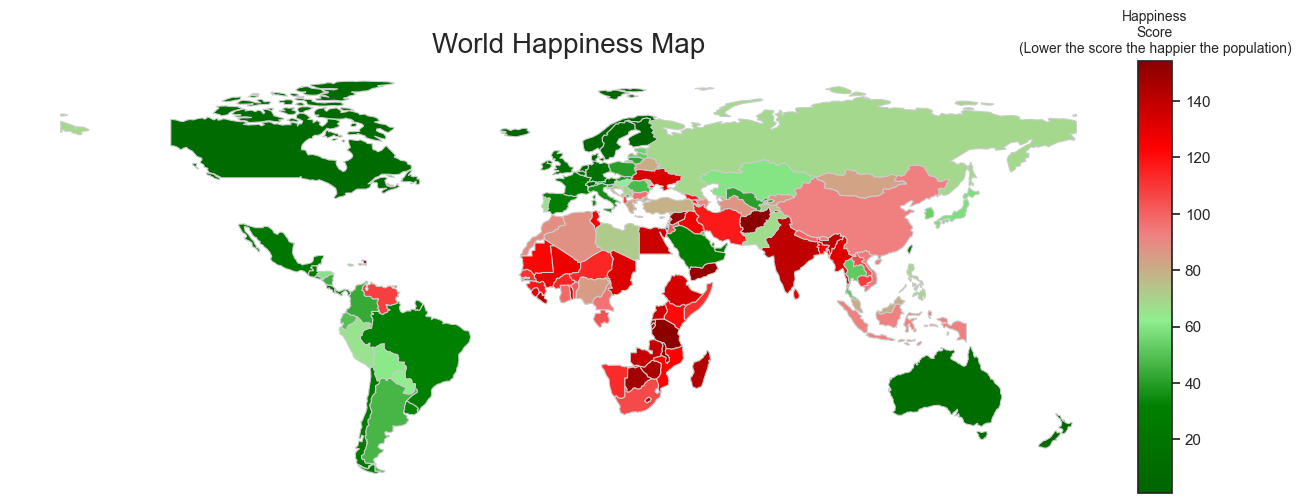

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import seaborn as sns

happiness_report = pd.read_csv('world-happiness-report.csv')
print(happiness_report.head())

# Check for missing values
print(happiness_report.isnull().sum())

# Fill missing values in numeric columns with mean
numeric_columns = happiness_report.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_columns:
    happiness_report[col].fillna(happiness_report[col].mean(), inplace=True)
    
print(happiness_report[numeric_columns].isnull().sum())

# Summary statistics

print(happiness_report.describe())

# Scatter plot matrix 
sns.set(style="white")

scatter_plot_matrix = sns.pairplot(happiness_report, diag_kind='kde', height=4)
plt.show()


# Create pair plot
columns_to_select = ['Log of GDP\nper capita', 'Ladder']
sns.set(style="white")

# Select columns
selected_columns = happiness_report[columns_to_select]
scatter_plot_matrix = sns.pairplot(selected_columns, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'k', 'linewidths': 0.5}, height=4)
scatter_plot_matrix.set(xlabel="Log of GDP per capita", ylabel="Happiness Score")
for ax in scatter_plot_matrix.axes.flatten():
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
plt.show()

print(happiness_report.head())


# Compute the correlation matrix for the numeric columns
numeric_columns = happiness_report.select_dtypes(include=[np.number])
corr = numeric_columns.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
cmap = sns.color_palette("viridis", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

# Create a map using geospatial data, showing the happiness score 'Ladder' for each country
import matplotlib.colors as mcolors
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.set_index('name').join(happiness_report.set_index('Country (region)'))

colors = ["darkgreen", "green", "lightgreen", "lightcoral", "red", "darkred"]
cmap = mcolors.LinearSegmentedColormap.from_list("", colors)

from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
merged.plot(column='Ladder', ax=ax, legend=True, cmap=cmap, linewidth=0.8, edgecolor='0.8', cax=cax)
ax.set_title('World Happiness Map', fontsize=20)
cax.set_title('Happiness\nScore\n(Lower the score the happier the population)', fontsize=10)
ax.axis('off')

plt.show()